[View in Colaboratory](https://colab.research.google.com/github/anu0508/Assignment_11.2_LinReg/blob/master/Assignment_11_2.ipynb)

In [0]:
### Build the linear regression model using scikit learn on boston data to predict 'Price based on other dependent variable.

In [0]:
import numpy as np # for numerical claculation using array
import pandas as pd # for dataframe operation
import scipy.stats as stats # modelling using stats model
import matplotlib.pyplot as plt # for visualization
import sklearn  # for modelling 
from sklearn.datasets import load_boston # data import
boston = load_boston()   
bos = pd.DataFrame(boston.data)

In [3]:
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
# no of rows and columns
bos.shape

(506, 13)

In [5]:
#since given dataset doesn't have columns so using command below we get the description about feature's name and target variable
print(boston.DESCR)


Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [0]:
#renaming the columns
bos.rename(columns={0:'CRIM', 1:'ZN',2:'INDUS', 3:'CHAS', 4:'NOX', 5:'RM', 6:'AGE', 7:'DIS', 8:'RAD',9:'TAX', 10:'PTRATIO', 11:'B', 12:'LSTAT'}, inplace=True)

In [7]:
# after renaming the columns cheking the head of the data
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [8]:
boston.target # Target variable

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

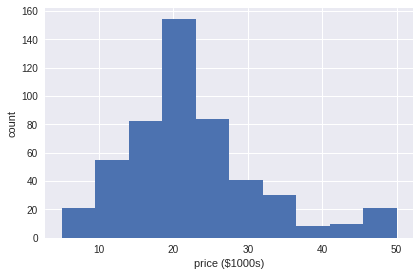

In [11]:
#plotting histogram of the target variable
import  matplotlib.pyplot  as plt
plt.figure(figsize=(6, 4))
plt.hist(boston.target)
plt.xlabel('price ($1000s)')
plt.ylabel('count')
plt.tight_layout()

In [0]:
bos['Price'] = boston.target


In [13]:
bos.describe()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


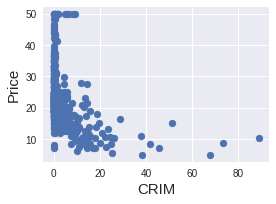

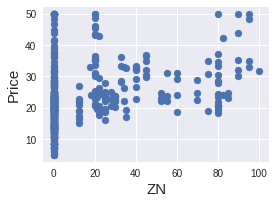

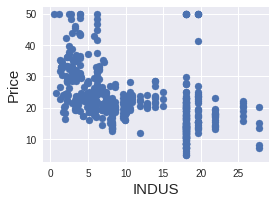

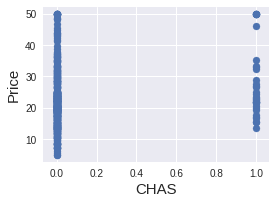

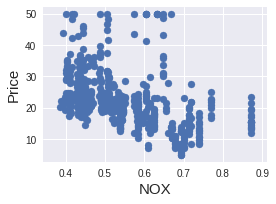

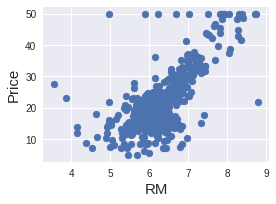

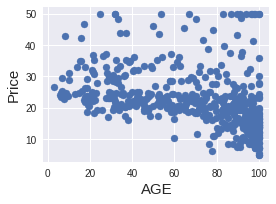

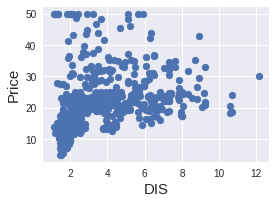

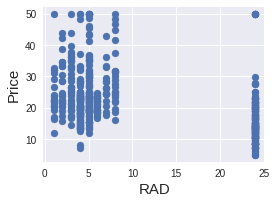

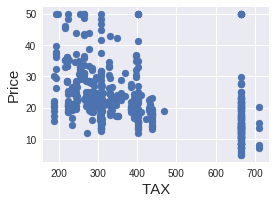

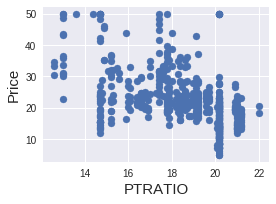

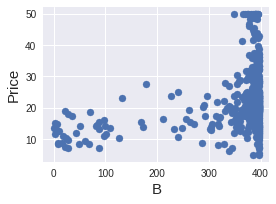

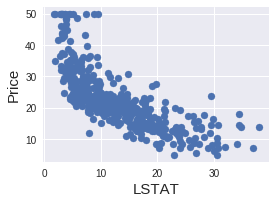

In [14]:
### visualization
# Print the scatter plot for each feature with respect to price
for index, feature_name in enumerate(boston.feature_names):
    plt.figure(figsize=(4, 3))
    plt.scatter(boston.data[:, index], boston.target)
    plt.ylabel('Price', size=15)
    plt.xlabel(feature_name, size=15)
    plt.tight_layout()

In [0]:
#check missing values in the feature set
total_missing=bos.isnull().sum()

In [16]:
bos.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'Price'],
      dtype='object')

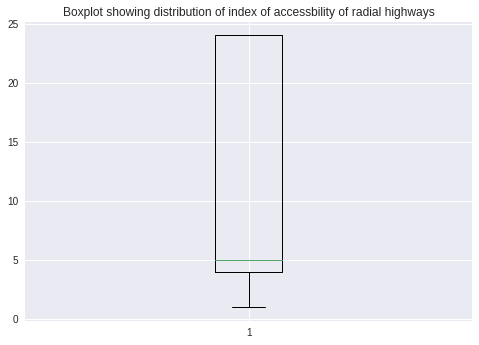

In [17]:
#creating boxplot to see the distribution median and outliers
plt.boxplot(bos['RAD'])
plt.title("Boxplot showing distribution of index of accessbility of radial highways")
plt.show()

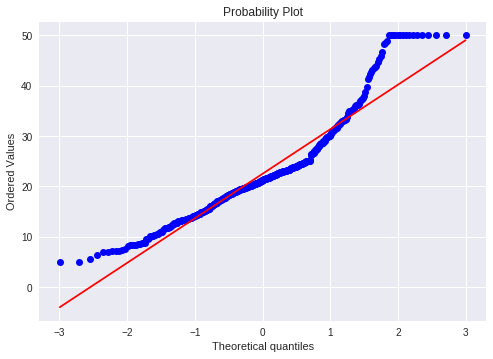

In [19]:
import pylab  #Plotting
import scipy.stats as stats # scintific calculation
stats.probplot(bos['Price'], dist="norm", plot=pylab)
pylab.show()

In [0]:
#Creating features and target ready
y=bos.pop('Price')
X=bos

In [21]:
bos.head() # after removing target from the dataframe top 5 rows of the dataframe

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [0]:
from sklearn.model_selection import train_test_split # for train and test set split
from sklearn.model_selection import cross_val_score #Sklearn.model_seletion is used instead of sklearn.cross_validation to avoid 
#warning 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [24]:
print("size of the training feature set is",X_train.shape)
print("size of the test feature set is",X_test.shape)
print("size of the training Target set is",y_train.shape)
print("size of the test Target set is",y_test.shape)

size of the training feature set is (404, 13)
size of the test feature set is (102, 13)
size of the training Target set is (404,)
size of the test Target set is (102,)


In [26]:
#Linear regression
from sklearn.linear_model import LinearRegression #import from sklearn
linear_reg= LinearRegression() # instantiated linreg
linear_reg.fit(X_train,y_train) #fit the model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [0]:
#predict using X_test 
predicted= linear_reg.predict(X_test)

In [28]:
from sklearn.metrics import mean_squared_error # import mse from sklearn
#calculate root mean squarred error
np.sqrt(mean_squared_error(y_test, predicted))

5.783658787280848

In [0]:
from sklearn import metrics # import metrics from sklearn

Rsquared=linear_reg.score(X_train,y_train) # to determine r square Goodness of fit

In [30]:
# how good the model fits the training data can be determined by R squared metric which is here 0.77
Rsquared

0.7729718726571156

In [31]:
### K fold cross validation
# cross validation score
cv_score= cross_val_score(LinearRegression(),X,y,scoring='neg_mean_squared_error', cv=10) # k =10 
print(cv_score)

[  -9.30130569  -14.17208374  -14.10631149  -35.19479431  -31.92474931
  -19.85853694   -9.95792    -168.53075207  -33.61791833  -10.96654317]


In [32]:
# mean squared error
cv_score.mean()

-34.76309150542234

In [33]:
# Root mean squared error
np.sqrt(cv_score.mean() * -1) 

5.896023363710691

In [0]:
### with Linear regressor we are able to predict the model with 5.8 RMSE and r squared 0.78